In [1]:
#Loading packages 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
zhome_values_zip = pd.read_csv('../data/clean/zhome_value.csv')

df = pd.DataFrame(zhome_values_zip)

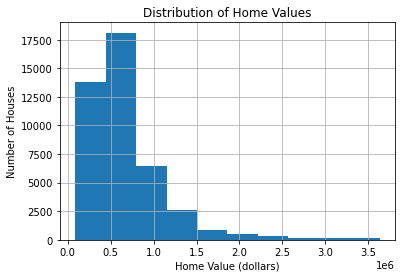

In [6]:
df['home_value'].hist()

plt.title("Distribution of Home Values")
plt.xlabel("Home Value (dollars)")
plt.ylabel("Number of Houses")

# Show the plot
plt.show()

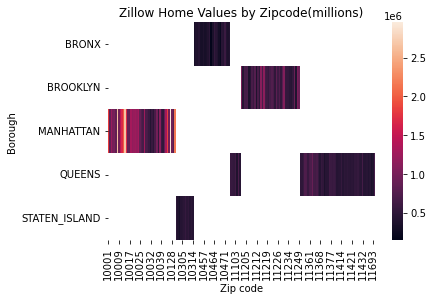

In [7]:
sns.heatmap(df.pivot_table(index='borough', columns='zip_code', values='home_value', aggfunc='mean'))
plt.xlabel('Zip code')
plt.ylabel('Borough')
plt.title('Zillow Home Values by Zipcode(millions)')
plt.show()

In [8]:
df_mean = df.groupby(['zip_code', 'borough']).home_value.mean().reset_index()

df_mean.sort_values(by='home_value', ascending=False, inplace=True)

print(df_mean)

    zip_code    borough    home_value
41     10118  MANHATTAN  2.953885e+06
11     10013  MANHATTAN  2.651030e+06
6      10007  MANHATTAN  2.641340e+06
44     10282  MANHATTAN  2.158213e+06
10     10012  MANHATTAN  1.998542e+06
..       ...        ...           ...
57     10451      BRONX  3.156599e+05
62     10456      BRONX  3.130362e+05
73     10467      BRONX  2.999500e+05
74     10468      BRONX  2.118511e+05
68     10462      BRONX  1.466952e+05

[177 rows x 3 columns]


In [9]:
#MANHATTAN TOP 5 ZIP CODES

df_manhattan= df_mean[df_mean['borough'].isin(['MANHATTAN'])]

# Sort the rows by home value in descending order
df_manhattan = df_manhattan.sort_values(by='home_value', ascending=False)

# Select the top 5 rows
manhattan_top_5 = df_manhattan.head(5)

# Print the resulting dataframe
print(manhattan_top_5)

#QUEENS TOP 5 ZIPCODES
df_queens= df_mean[df_mean['borough'].isin(['QUEENS'])]

# Sort the rows by home value in descending order
df_queens = df_queens.sort_values(by='home_value', ascending=False)

# Select the top 5 rows
queens_top_5 = df_queens.head(5)

# Print the resulting dataframe
print(queens_top_5)


#BK TOP 5 ZIPCODES
df_brooklyn= df_mean[df_mean['borough'].isin(['BROOKLYN'])]

# Sort the rows by home value in descending order
df_brooklyn = df_brooklyn.sort_values(by='home_value', ascending=False)

# Select the top 5 rows
bk_top_5 = df_brooklyn.head(5)

# Print the resulting dataframe
print(bk_top_5)

#STATEN ILAND TOP 5 ZIPCODES
df_staten= df_mean[df_mean['borough'].isin(['STATEN_ISLAND'])]

# Sort the rows by home value in descending order
df_staten = df_staten.sort_values(by='home_value', ascending=False)

# Select the top 5 rows
staten_top_5 = df_staten.head(5)

# Print the resulting dataframe
print(staten_top_5)


#BRONX TOP 5 ZIPCODES
df_bronx= df_mean[df_mean['borough'].isin(['BRONX'])]

# Sort the rows by home value in descending order
df_bronx = df_bronx.sort_values(by='home_value', ascending=False)

# Select the top 5 rows
bronx_top_5 = df_bronx.head(5)

# Print the resulting dataframe
print(bronx_top_5)

    zip_code    borough    home_value
41     10118  MANHATTAN  2.953885e+06
11     10013  MANHATTAN  2.651030e+06
6      10007  MANHATTAN  2.641340e+06
44     10282  MANHATTAN  2.158213e+06
10     10012  MANHATTAN  1.998542e+06
     zip_code borough     home_value
135     11363  QUEENS  888125.755020
130     11357  QUEENS  719995.036000
134     11362  QUEENS  714293.755020
131     11358  QUEENS  700550.180723
86      11105  QUEENS  698675.152000
     zip_code   borough   home_value
103     11217  BROOKLYN  1136523.044
101     11215  BROOKLYN  1094520.928
116     11231  BROOKLYN  1065775.792
88      11201  BROOKLYN  1034488.912
125     11243  BROOKLYN  1021440.880
    zip_code        borough  home_value
51     10307  STATEN_ISLAND  547081.464
53     10309  STATEN_ISLAND  498783.628
50     10306  STATEN_ISLAND  468805.856
55     10312  STATEN_ISLAND  468034.124
45     10301  STATEN_ISLAND  464242.480
    zip_code borough     home_value
77     10471   BRONX  579882.895582
70     10464   B

In [10]:
top5_zip_per_boro = pd.concat([manhattan_top_5, bk_top_5, queens_top_5, bronx_top_5, staten_top_5], axis=0)

print(top5_zip_per_boro)

     zip_code        borough    home_value
41      10118      MANHATTAN  2.953885e+06
11      10013      MANHATTAN  2.651030e+06
6       10007      MANHATTAN  2.641340e+06
44      10282      MANHATTAN  2.158213e+06
10      10012      MANHATTAN  1.998542e+06
103     11217       BROOKLYN  1.136523e+06
101     11215       BROOKLYN  1.094521e+06
116     11231       BROOKLYN  1.065776e+06
88      11201       BROOKLYN  1.034489e+06
125     11243       BROOKLYN  1.021441e+06
135     11363         QUEENS  8.881258e+05
130     11357         QUEENS  7.199950e+05
134     11362         QUEENS  7.142938e+05
131     11358         QUEENS  7.005502e+05
86      11105         QUEENS  6.986752e+05
77      10471          BRONX  5.798829e+05
70      10464          BRONX  5.297708e+05
67      10461          BRONX  4.694018e+05
75      10469          BRONX  4.491432e+05
71      10465          BRONX  4.374839e+05
51      10307  STATEN_ISLAND  5.470815e+05
53      10309  STATEN_ISLAND  4.987836e+05
50      103

Text(0, 0.5, 'Mean Home Value (dollars)')

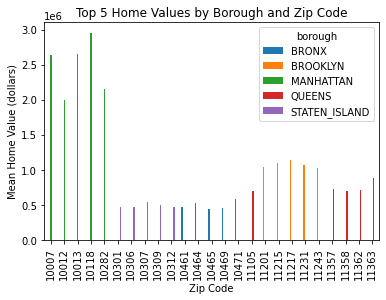

In [11]:
mean_home_value_by_borough_zip = top5_zip_per_boro.groupby(['borough', 'zip_code'])['home_value'].mean()
mean_home_value_pivot = mean_home_value_by_borough_zip.unstack(level=0)


# Plot the pivot table as a bar plot
mean_home_value_pivot.plot.bar()
plt.title("Top 5 Home Values by Borough and Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Mean Home Value (dollars)")
# Show the plot

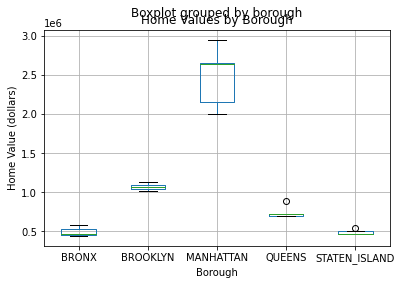

In [21]:
top5_zip_per_boro.boxplot(column='home_value', by='borough')


plt.title("Home Values by Borough")
plt.xlabel("Borough")
plt.ylabel("Home Value (dollars)")
plt.show()

In [13]:
#MANHATTAN Lowest 5 ZIP CODES

df_manhattan1= df_mean[df_mean['borough'].isin(['MANHATTAN'])]

df_manhattan1 = df_manhattan1.sort_values(by='home_value', ascending=True)

manhattan_low_5 = df_manhattan1.head(5)

# Print the resulting dataframe
print(manhattan_low_5)

#QUEENS bottom 5 ZIPCODES
df_queens1 = df_mean[df_mean['borough'].isin(['QUEENS'])]

df_queens1 = df_queens1.sort_values(by='home_value', ascending=True)

queens_low_5 = df_queens1.head(5)

# Print the resulting dataframe
print(queens_low_5)

#BK Lowest 5 ZIPCODES
df_brooklyn1 = df_mean[df_mean['borough'].isin(['BROOKLYN'])]

df_brooklyn1 = df_brooklyn1.sort_values(by='home_value', ascending=True)

bk_low_5 = df_brooklyn1.head(5)

# Print the resulting dataframe
print(bk_low_5)

#STATEN ILAND Lowest 5 ZIPCODES
df_staten1 = df_mean[df_mean['borough'].isin(['STATEN_ISLAND'])]

df_staten1 = df_staten1.sort_values(by='home_value', ascending=True)

staten_low_5 = df_staten1.head(5)

# Print the resulting dataframe
print(staten_low_5)


#BRONX Lowest 5 ZIPCODES
df_bronx1 = df_mean[df_mean['borough'].isin(['BRONX'])]

df_bronx1 = df_bronx1.sort_values(by='home_value', ascending=True)

bronx_low_5 = df_bronx1.head(5)

# Print the resulting dataframe
print(bronx_low_5)

    zip_code    borough     home_value
28     10032  MANHATTAN  414161.996000
30     10034  MANHATTAN  453817.137725
33     10037  MANHATTAN  503576.934783
36     10040  MANHATTAN  505051.487179
29     10033  MANHATTAN  558071.166667
     zip_code borough     home_value
174     11692  QUEENS  346566.100000
143     11372  QUEENS  356633.697581
85      11104  QUEENS  386219.164659
175     11693  QUEENS  388356.144000
172     11436  QUEENS  403076.004000
     zip_code   borough     home_value
93      11207  BROOKLYN  362731.896000
98      11212  BROOKLYN  377260.592000
124     11239  BROOKLYN  388316.288660
94      11208  BROOKLYN  432871.908000
121     11236  BROOKLYN  433841.361446
    zip_code        borough  home_value
47     10303  STATEN_ISLAND  323493.716
46     10302  STATEN_ISLAND  383515.180
56     10314  STATEN_ISLAND  422667.360
54     10310  STATEN_ISLAND  423657.344
48     10304  STATEN_ISLAND  428300.292
    zip_code borough     home_value
68     10462   BRONX  146695.20800

In [14]:
low5_zip_per_boro = pd.concat([manhattan_low_5, bk_low_5, queens_low_5, bronx_low_5, staten_low_5], axis=0)

# Print the resulting dataframe
print(low5_zip_per_boro)

     zip_code        borough     home_value
28      10032      MANHATTAN  414161.996000
30      10034      MANHATTAN  453817.137725
33      10037      MANHATTAN  503576.934783
36      10040      MANHATTAN  505051.487179
29      10033      MANHATTAN  558071.166667
93      11207       BROOKLYN  362731.896000
98      11212       BROOKLYN  377260.592000
124     11239       BROOKLYN  388316.288660
94      11208       BROOKLYN  432871.908000
121     11236       BROOKLYN  433841.361446
174     11692         QUEENS  346566.100000
143     11372         QUEENS  356633.697581
85      11104         QUEENS  386219.164659
175     11693         QUEENS  388356.144000
172     11436         QUEENS  403076.004000
68      10462          BRONX  146695.208000
74      10468          BRONX  211851.096000
73      10467          BRONX  299950.032129
62      10456          BRONX  313036.236000
57      10451          BRONX  315659.923077
47      10303  STATEN_ISLAND  323493.716000
46      10302  STATEN_ISLAND  38

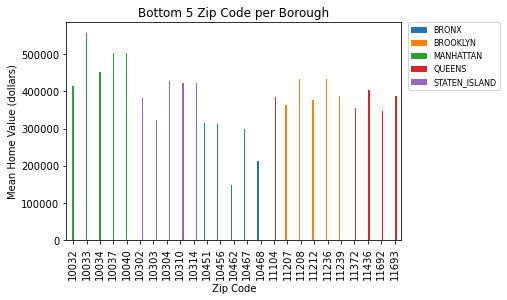

In [15]:
mean_home_value_by_borough_zip1 = low5_zip_per_boro.groupby(['borough', 'zip_code'])['home_value'].mean()
mean_home_value_pivot1 = mean_home_value_by_borough_zip1.unstack(level=0)


# Plot the pivot table as a bar plot
mean_home_value_pivot1.plot.bar()
plt.title("Bottom 5 Zip Code per Borough")
plt.xlabel("Zip Code")
plt.ylabel("Mean Home Value (dollars)")
plt.legend(fontsize=8, bbox_to_anchor =(1.02, 1), loc='upper left', borderaxespad=0)
# Show the plot
plt.show()

Text(0, 0.5, 'Home Value (dollars)')

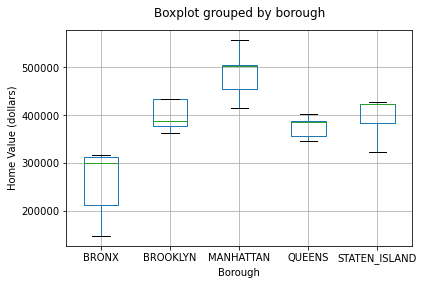

In [16]:
low5_zip_per_boro.boxplot(column='home_value', by='borough')


plt.title("")

# Add x-axis and y-axis labels
plt.xlabel("Borough")
plt.ylabel("Home Value (dollars)")